In [1]:

import pandas as pd
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt

Vals=[[[0.9484340664536652, 0.9784340664536653, 0.9931340664536652],
  [0.014254389004087518, 0.0025219303622616377, 0.0023417924792429492]],
 [[0.7936138480991906, 0.8046138480991906],
  [0.0071433122466355746, 0.004464570154147234]],
 [[0.8376245318244986], [0.0252897817147061]],
 [[0.22658177619586303, 0.19658177619586303, 0.26658177619586304],
  [0.017723187384414123, 0.024812462338179773, 0.024812462338179773]],
 [[0.7657530096468956], [0.00913493927855572]],
 [[0.26004407812801333, 0.29604407812801337],
  [0.007865308884675756, 0.007865308884675756]],
 [[0.20455698691369786, 0.20905698691369787, 0.21255698691369787],
  [0.004182317600031124, 0.003223869816690659, 0.0030949150240230324]],
 [[0.7964640307395834], [0.004678810291478035]],
 [[0.2876394068100697], [0.04977536649561848]],
 [[0.3782778405001759, 0.4002778405001759, 0.42327784050017586],
  [0.013565914060876382, 0.009043942707250922, 0.009043942707250922]],
 [[0.3237166373147935], [0.06777925258425803]],
 [[0.666138401960929, 0.569138401960929],
  [0.027426367935807355, 0.05142443987963879]],
 [[0.44834554852301467], [0.07702476580132267]],
 [[0.6364067410911713], [0.03101799388907781]],
 [[0.33095574440694947], [0.0689618587384055]],
 [[0.3690293923708653], [0.030796557389609774]],
 [[0.6492865229987796], [0.02844020075326856]],
 [[0.5160152674304279], [0.07926005352366602]],
 [[0.5632228503176914], [0.0633893066015578]],
 [[0.5802584562370857], [0.008192221859119674]],
 [[0.6063013783557769], [0.012476957428528623]],
 [[0.48002986320945185, 0.5150298632094519, 0.5450298632094519],
  [0.01687953145194964, 0.01687953145194964, 0.01687953145194964]],
 [[0.6654346442861285], [0.00923040728245121]],
 [[0.16025866396574792,
   0.20025866396574793,
   0.24725866396574792,
   0.28925866396574795,
   0.32925866396574793,
   0.38725866396574793,
   0.41225866396574795,
   0.4372586639657479,
   0.4752586639657479,
   0.5172586639657479],
  [0.1360465453647784,
   0.16325585443773408,
   0.06279071324528233,
   0.4081396360943352,
   0.01813953938197045,
   0.01360465453647784,
   0.01360465453647784,
   0.011661132459838148,
   0.02040698180471676,
   0.008162792721886704]],
 [[0.5659025305471793, 0.5919025305471793],
  [0.014613321607611968, 0.014613321607611968]],
 [[0.38543373932897806, 0.44343373932897806, 0.548433739328978],
  [0.03938650889056187, 0.015754603556224746, 0.15754603556224747]],
 [[0.4165055040372798], [0.007380241704791118]],
 [[0.31312120760909556], [0.006687974879992666]],
 [[0.0034366304371742378], [0.009735047089640467]]]

In [2]:
data = pd.read_csv('data_good.csv')

data.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [3]:
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
keys = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
y = ['Class']

In [5]:

for k in keys:
#    data[k]=(data[k]-np.mean(data[k]))/(np.std(data[k]))
    data[k]=(data[k]-np.min(data[k]))/(np.max(data[k])-np.min(data[k]))
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,0.935192,0.792888,0.881365,0.313023,0.763439,0.267669,0.210066,0.797548,0.304057,...,0.606004,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.0,0.978542,0.796587,0.840298,0.271796,0.766120,0.262192,0.207977,0.797401,0.275764,...,0.602393,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,1.0,0.935217,0.779055,0.868141,0.268766,0.762329,0.281122,0.213689,0.799169,0.218228,...,0.610640,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,1.0,0.941878,0.791661,0.868484,0.213661,0.765647,0.275559,0.210053,0.800581,0.224060,...,0.604438,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,2.0,0.938617,0.803263,0.864251,0.269796,0.762975,0.263984,0.212386,0.793532,0.324799,...,0.606159,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0
5,2.0,0.951057,0.804166,0.857187,0.244472,0.768550,0.262721,0.211619,0.799307,0.261452,...,0.602698,0.483915,0.665042,0.332185,0.564839,0.442749,0.421196,0.314769,0.000143,0
6,4.0,0.979184,0.795221,0.838200,0.305241,0.767008,0.265762,0.208460,0.797358,0.308680,...,0.603403,0.497402,0.663145,0.277122,0.620014,0.383429,0.417148,0.313229,0.000194,0
7,7.0,0.947348,0.809159,0.856031,0.230111,0.772104,0.267324,0.215849,0.755052,0.315553,...,0.640154,0.462660,0.666288,0.294686,0.554597,0.417014,0.394234,0.291099,0.001588,0
8,7.0,0.943101,0.796806,0.835452,0.239894,0.783688,0.300439,0.210923,0.805733,0.269522,...,0.605045,0.497525,0.662401,0.518546,0.598855,0.362697,0.416728,0.316014,0.003628,0
9,9.0,0.952547,0.805903,0.855511,0.242081,0.769078,0.260539,0.212770,0.797231,0.253773,...,0.602025,0.480466,0.663640,0.330349,0.573992,0.440836,0.421056,0.314810,0.000143,0


In [15]:
#calcular las gaussianas para cada uno

def gauss_1(x,u,o):
    distribution=(1.0/(o*(2.0*np.pi)**(0.5)))*np.exp(-(0.5)*((x-u)**2.0/(o**2.0)))
    norm=sum(distribution)
    distribution=distribution/norm
    return distribution

def gauss(x,u,o):
    dist=0
    
    for i in range(len(u)):
        dist=dist+ gauss_1(x,u[i],o[i])

    norm=sum(dist)
    dist=dist/norm
    return dist


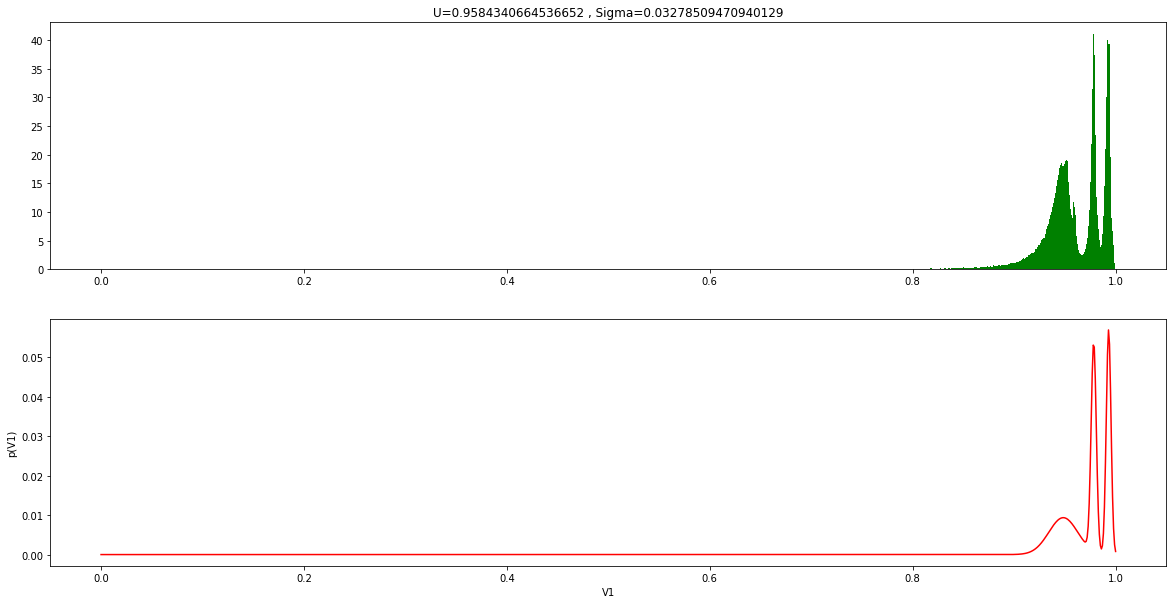

1.0 V1 0.9584340664536652 0.03278509470940129


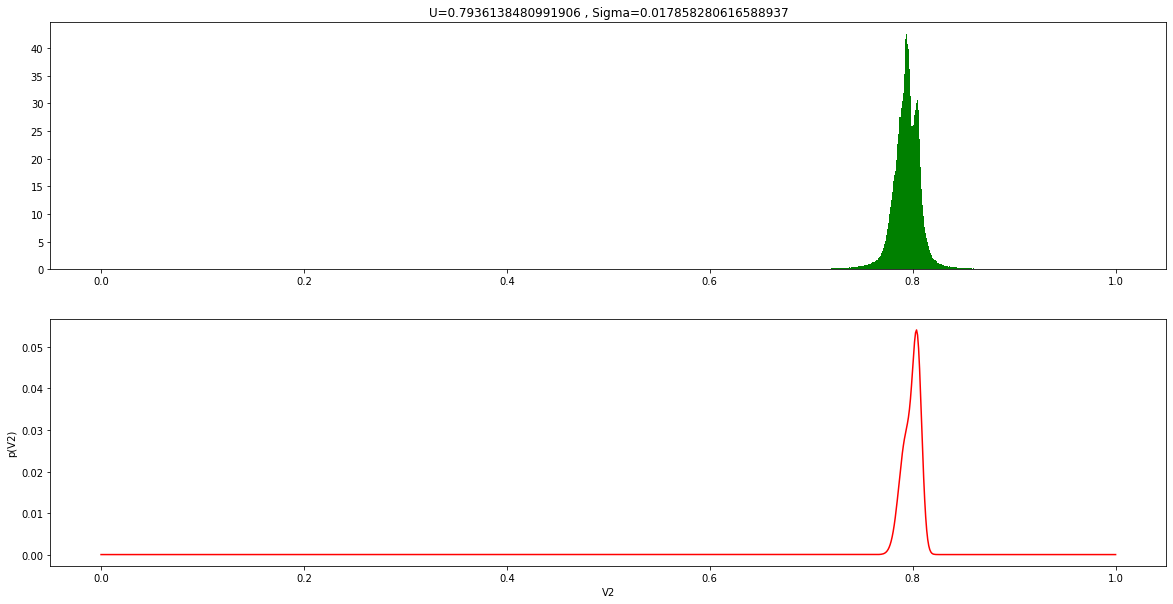

1.0000000000000004 V2 0.7936138480991906 0.017858280616588937


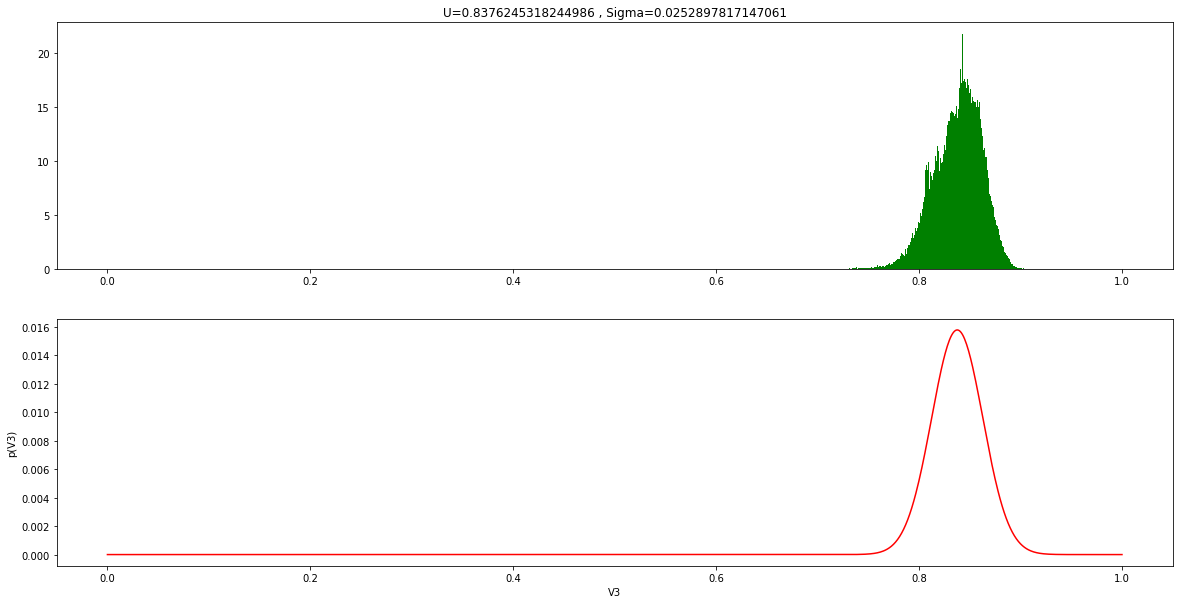

0.9999999999999999 V3 0.8376245318244986 0.0252897817147061


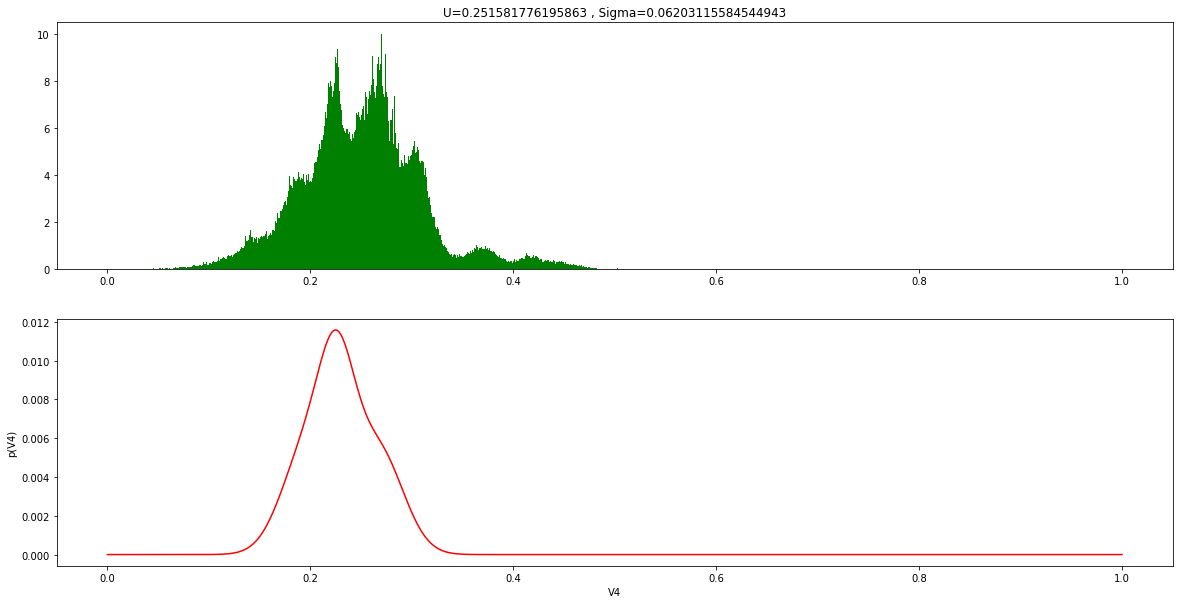

1.0000000000000009 V4 0.251581776195863 0.06203115584544943


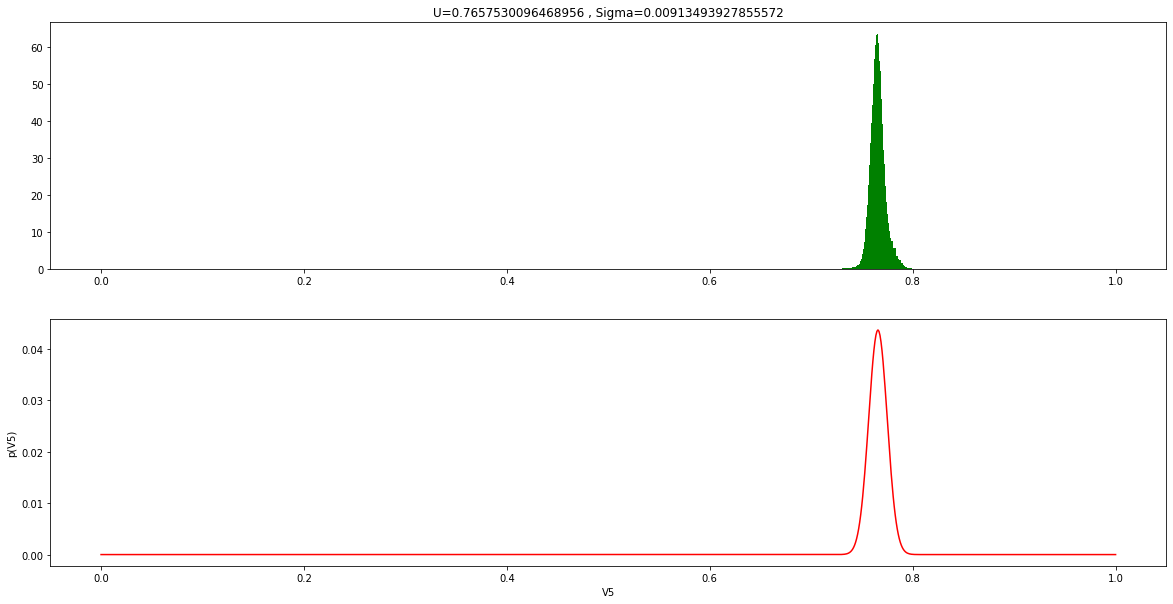

0.9999999999999996 V5 0.7657530096468956 0.00913493927855572


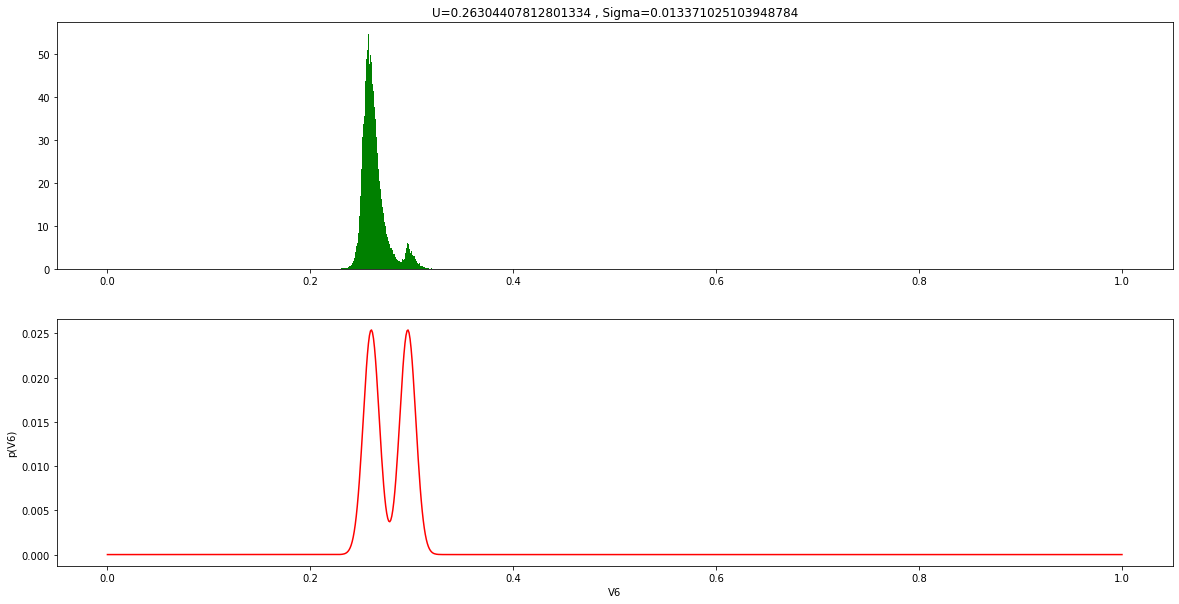

0.9999999999999996 V6 0.26304407812801334 0.013371025103948784


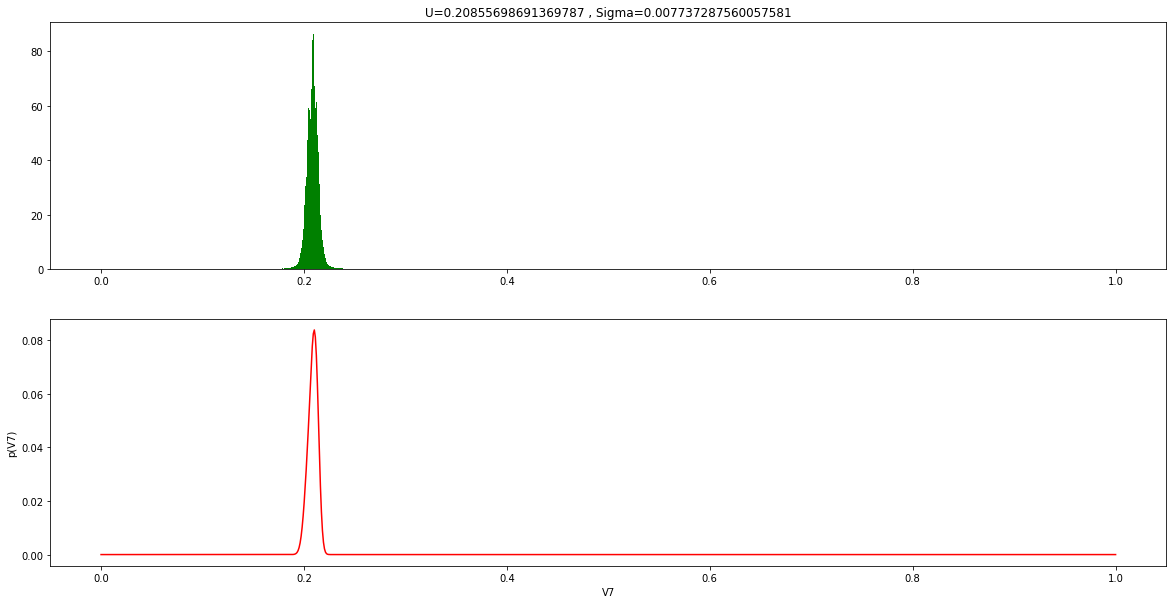

1.0000000000000004 V7 0.20855698691369787 0.007737287560057581


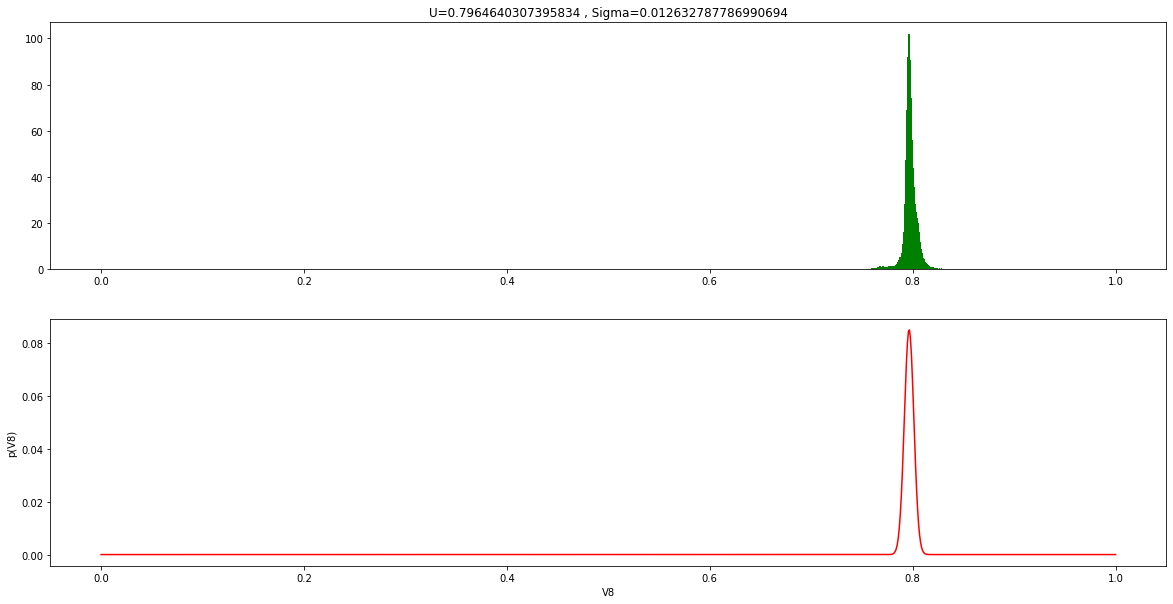

0.9999999999999998 V8 0.7964640307395834 0.012632787786990694


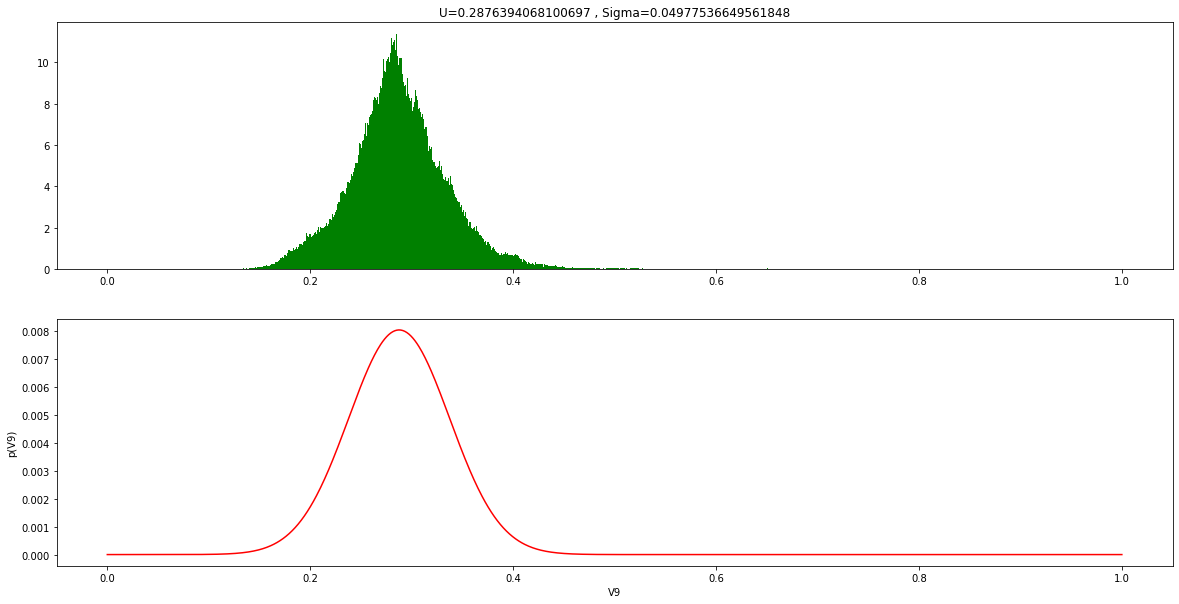

0.9999999999999996 V9 0.2876394068100697 0.04977536649561848


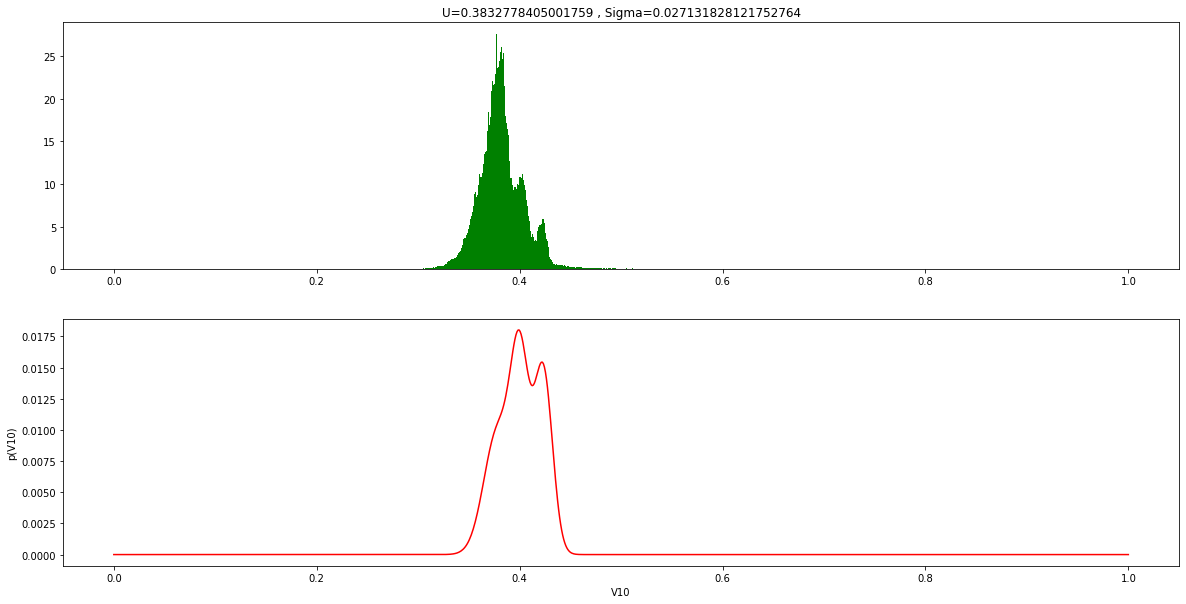

0.9999999999999994 V10 0.3832778405001759 0.027131828121752764


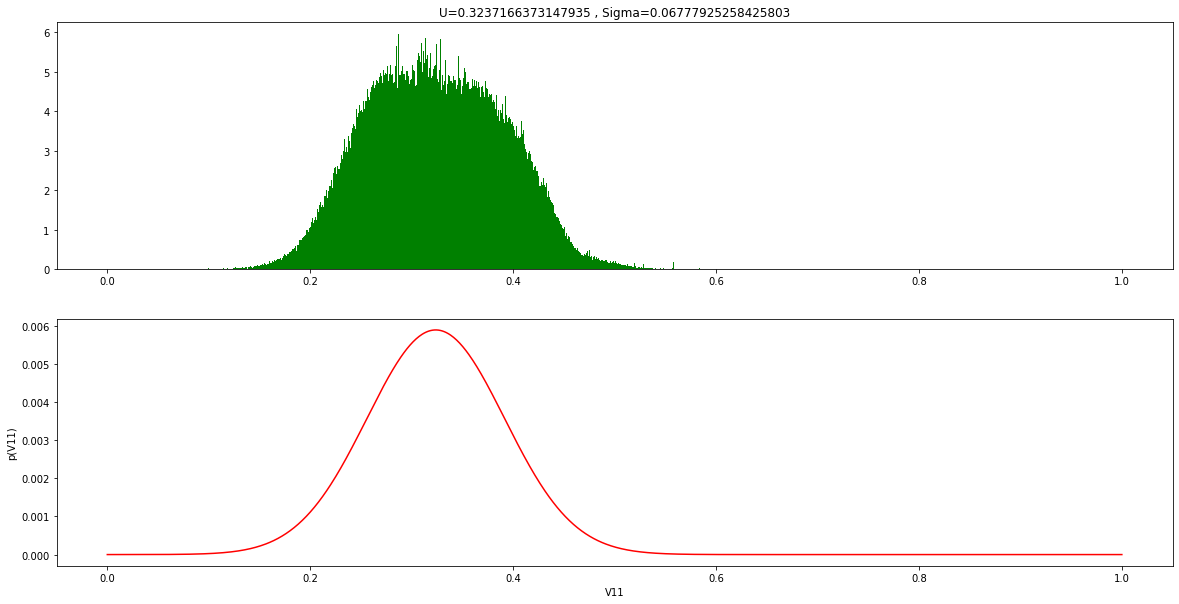

1.0 V11 0.3237166373147935 0.06777925258425803


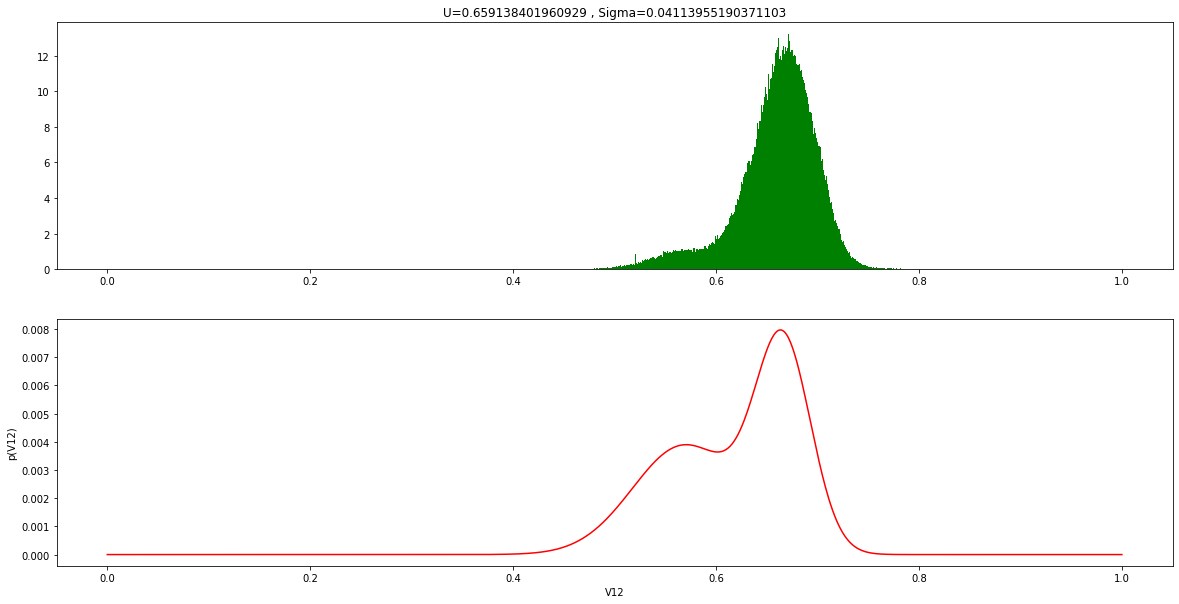

1.0000000000000002 V12 0.659138401960929 0.04113955190371103


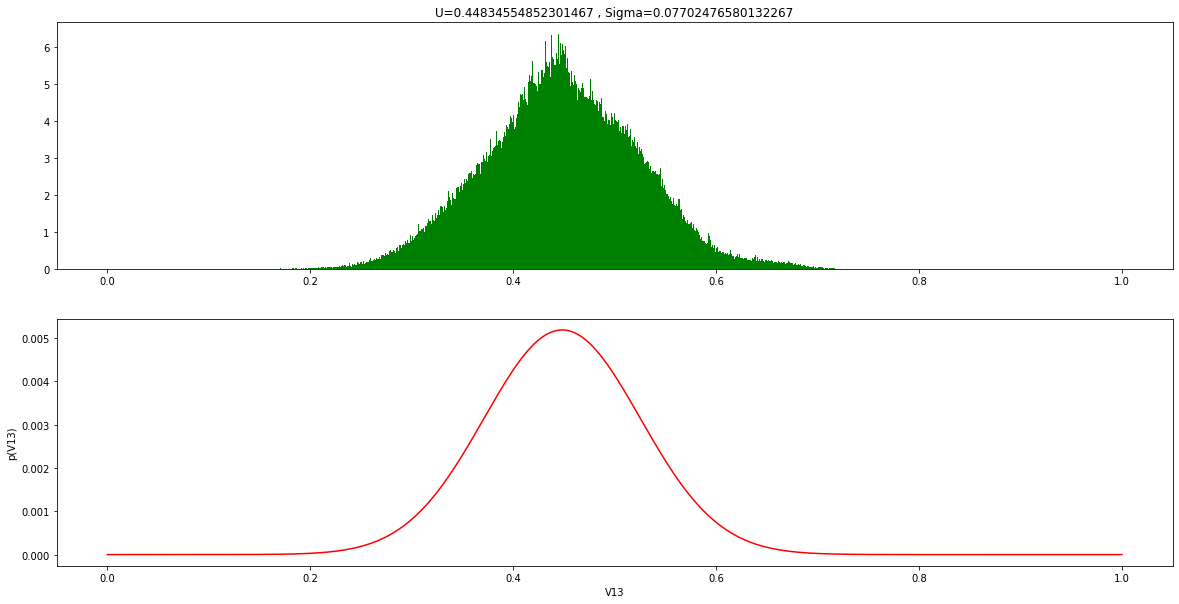

0.9999999999999991 V13 0.44834554852301467 0.07702476580132267


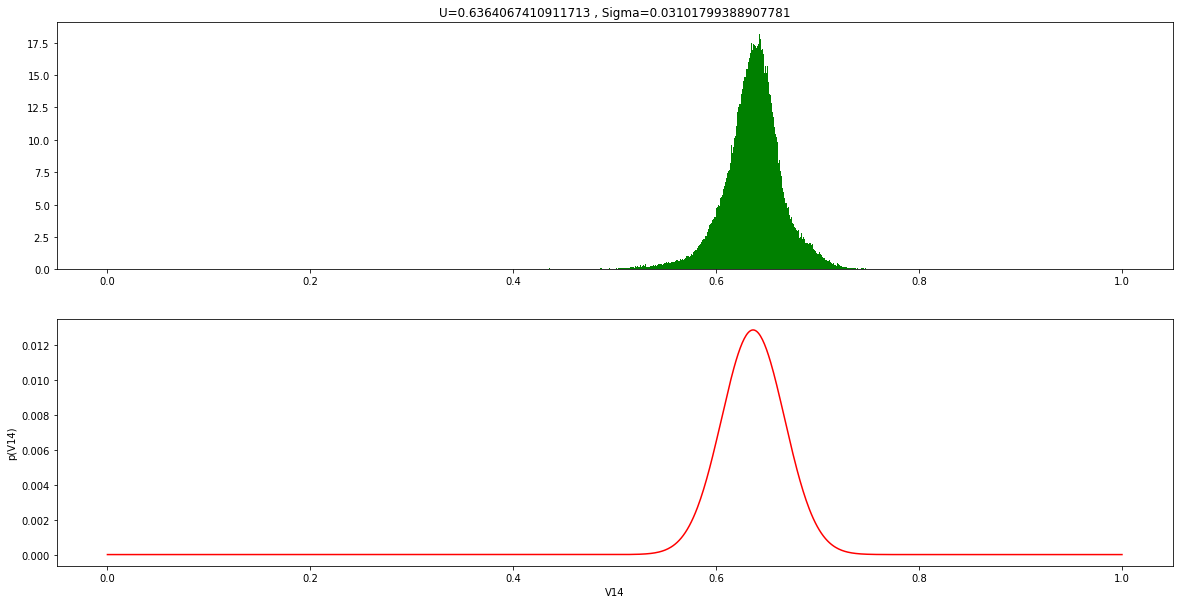

1.0 V14 0.6364067410911713 0.03101799388907781


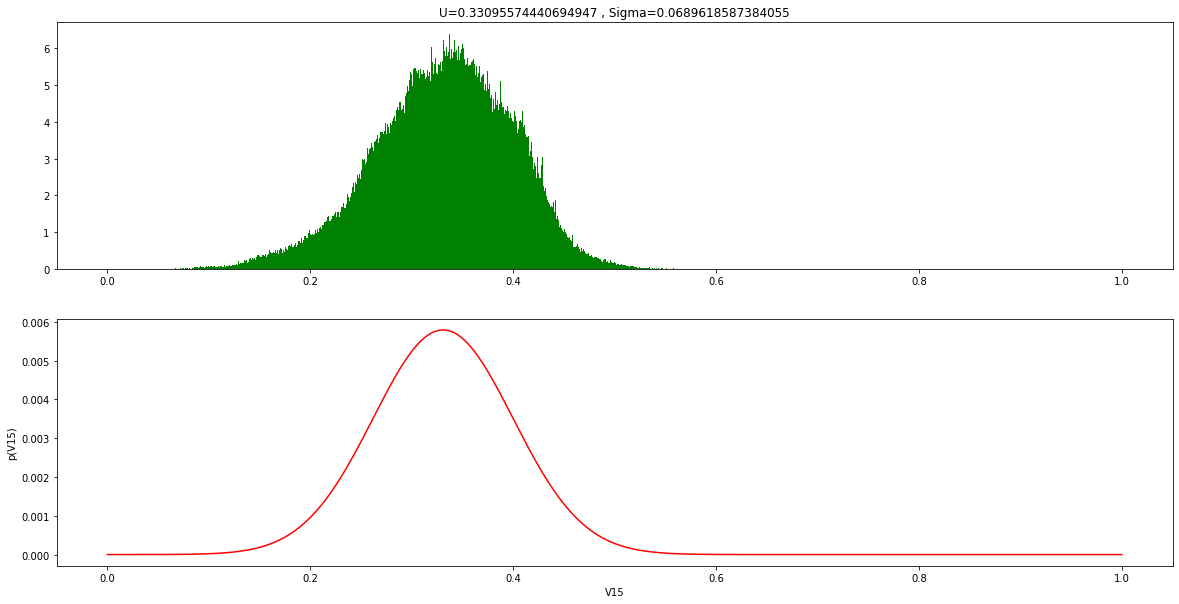

0.9999999999999999 V15 0.33095574440694947 0.0689618587384055


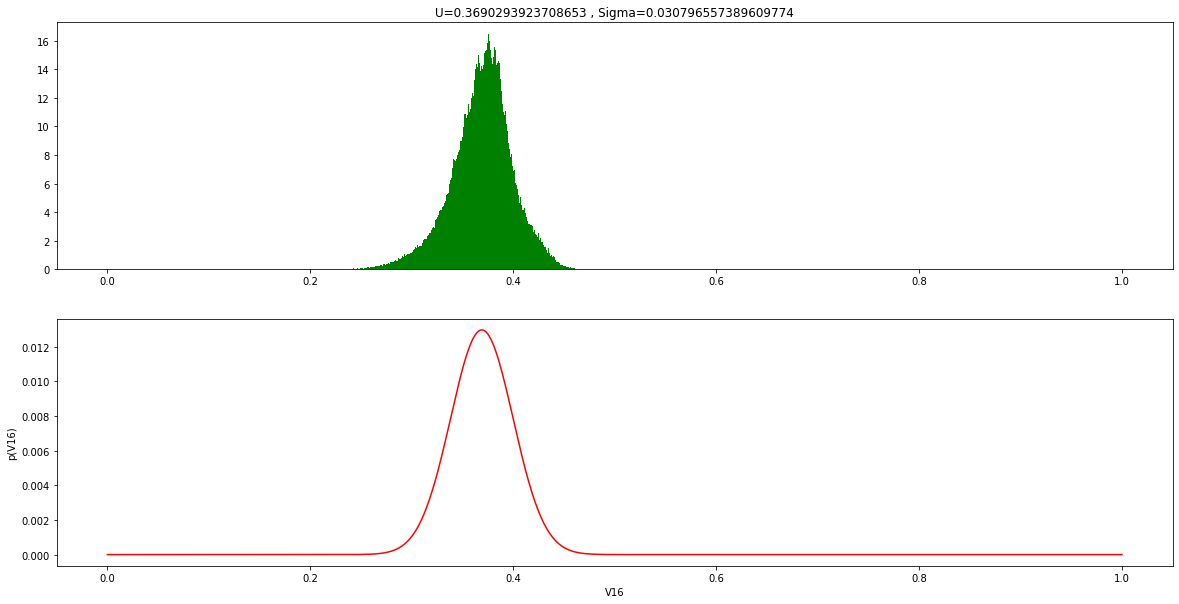

0.9999999999999999 V16 0.3690293923708653 0.030796557389609774


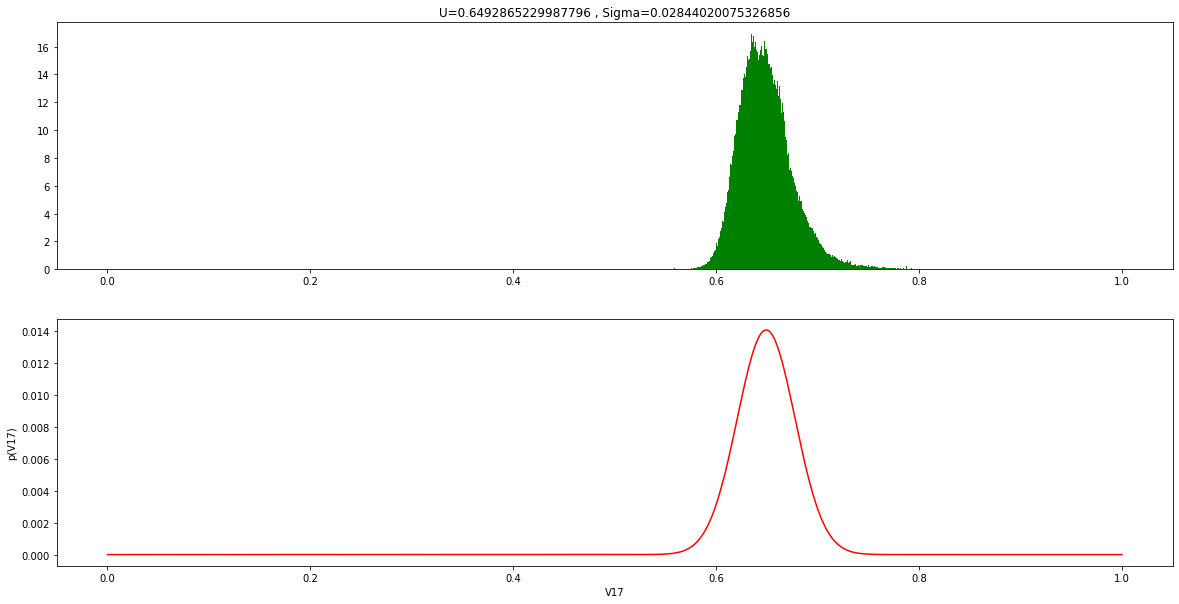

1.0 V17 0.6492865229987796 0.02844020075326856


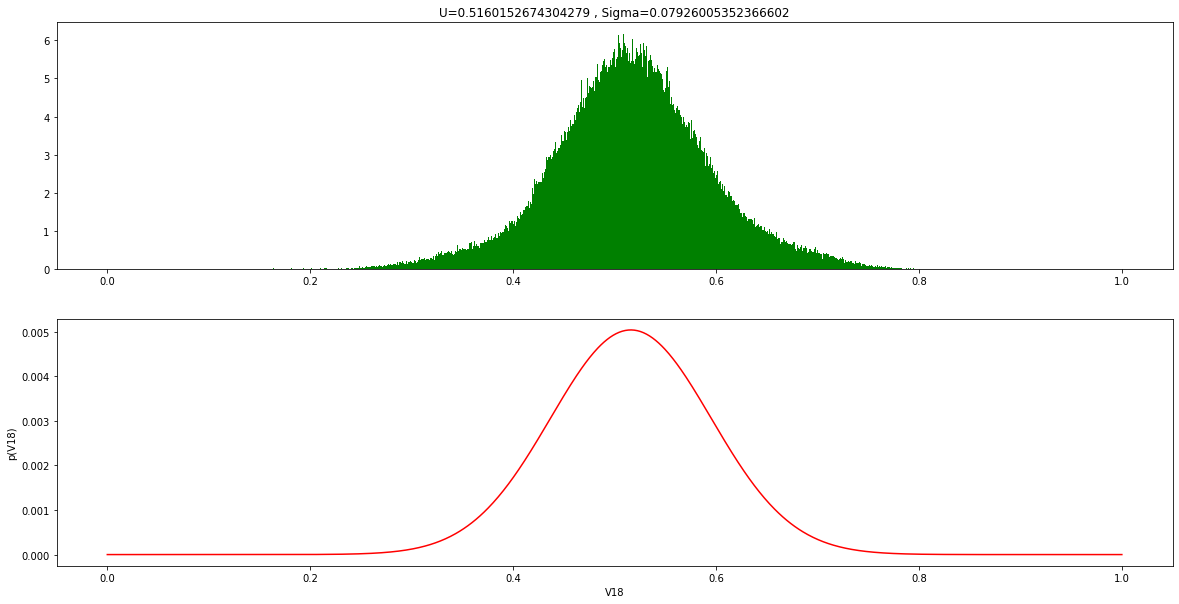

0.9999999999999996 V18 0.5160152674304279 0.07926005352366602


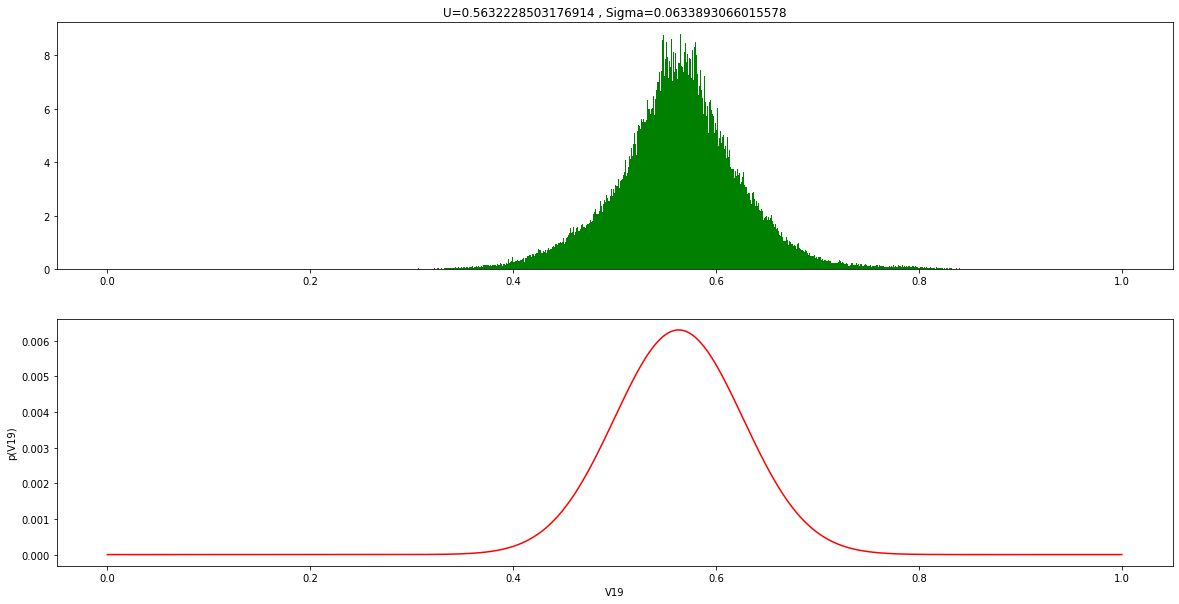

1.0000000000000009 V19 0.5632228503176914 0.0633893066015578


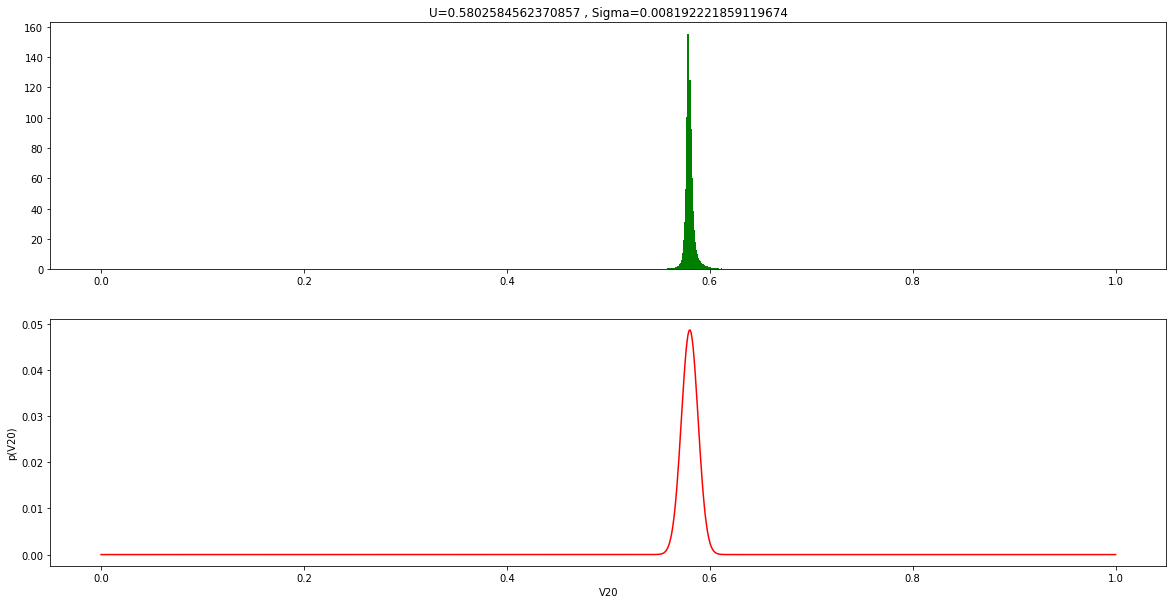

0.9999999999999998 V20 0.5802584562370857 0.008192221859119674


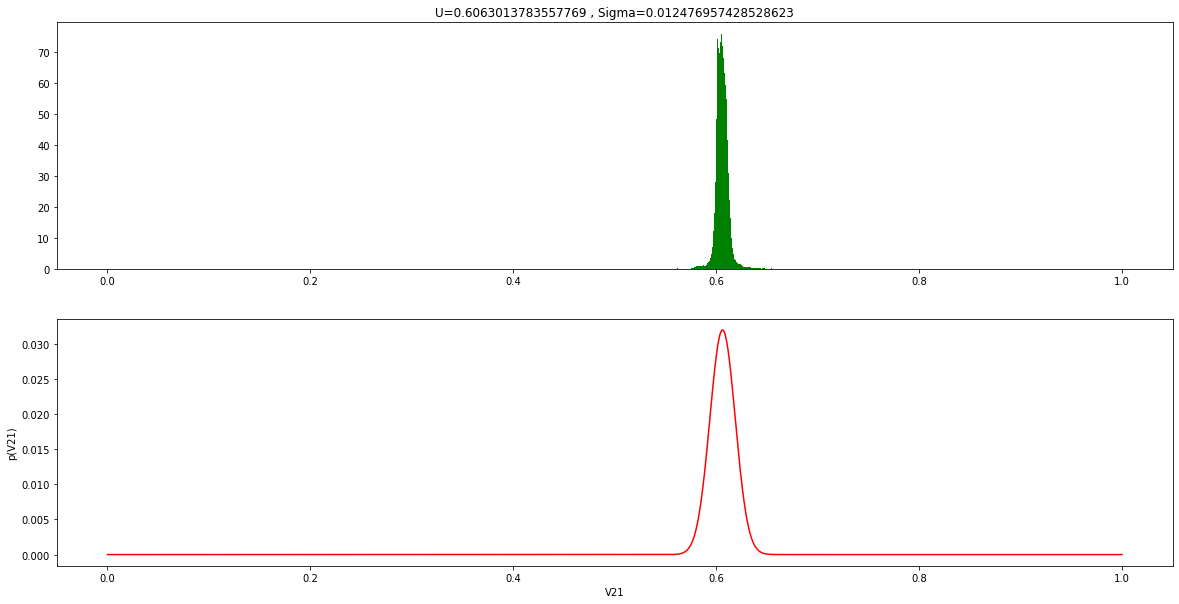

1.0000000000000002 V21 0.6063013783557769 0.012476957428528623


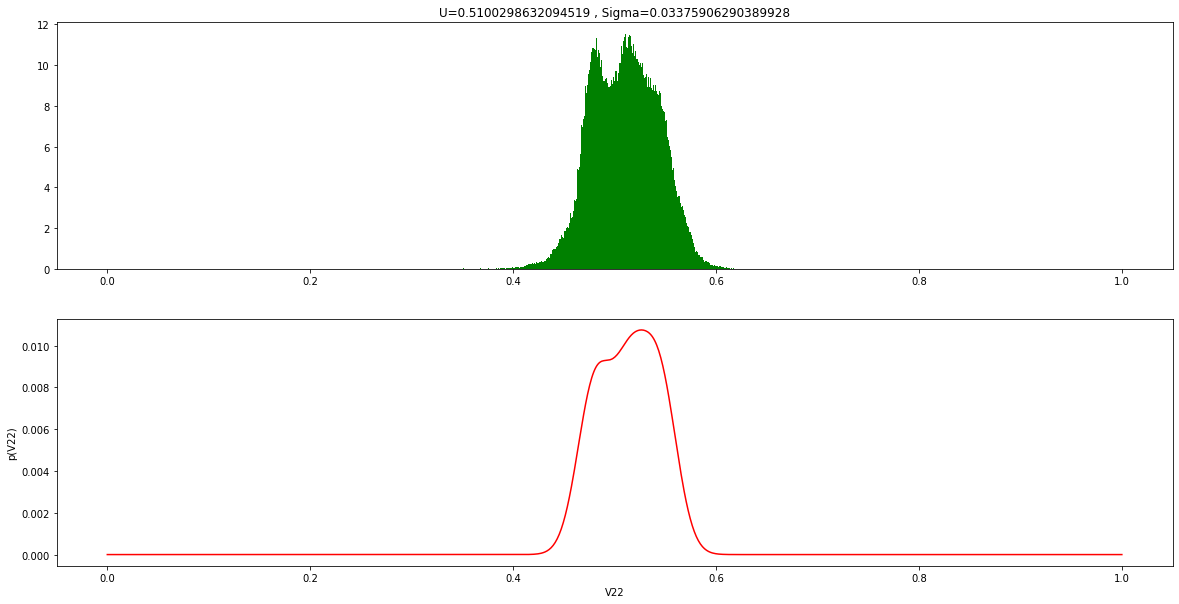

0.9999999999999998 V22 0.5100298632094519 0.03375906290389928


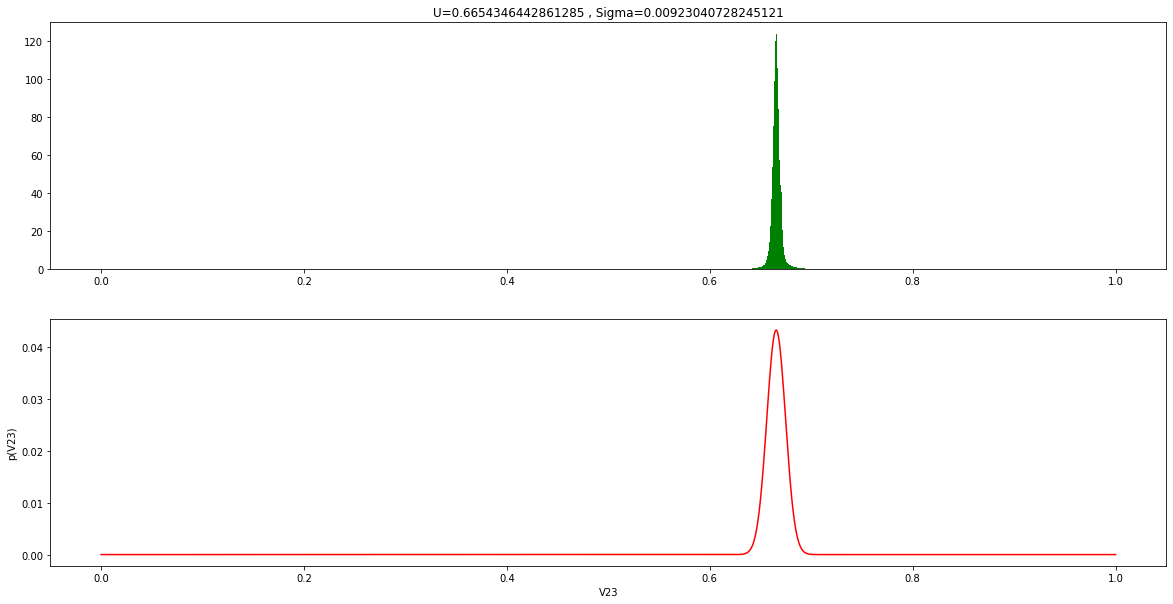

0.9999999999999996 V23 0.6654346442861285 0.00923040728245121


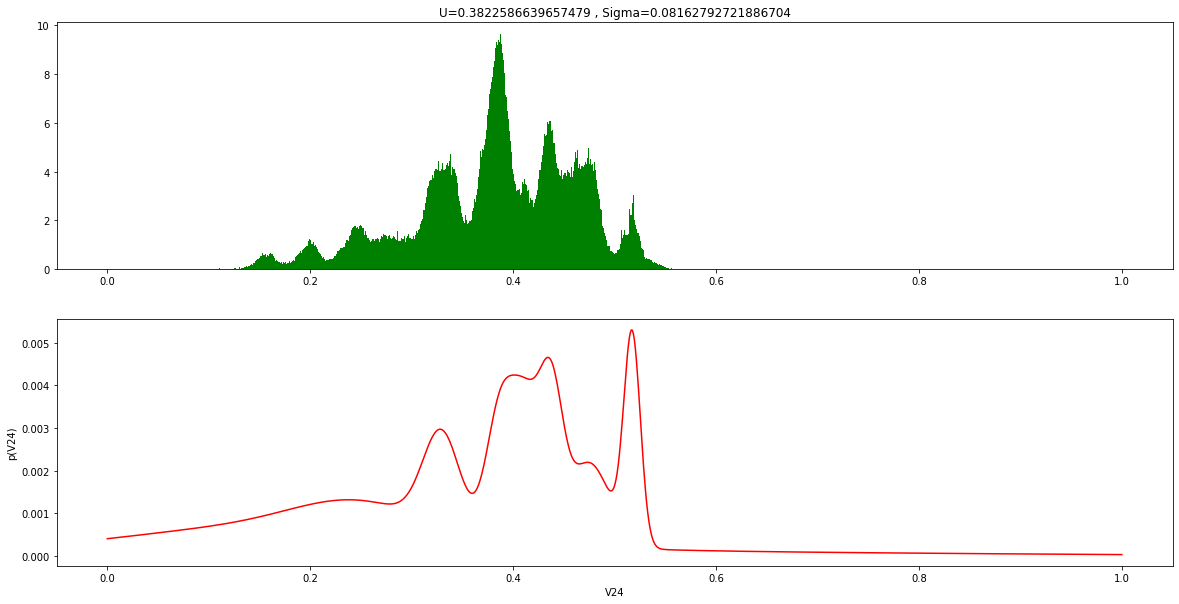

0.9999999999999996 V24 0.3822586639657479 0.08162792721886704


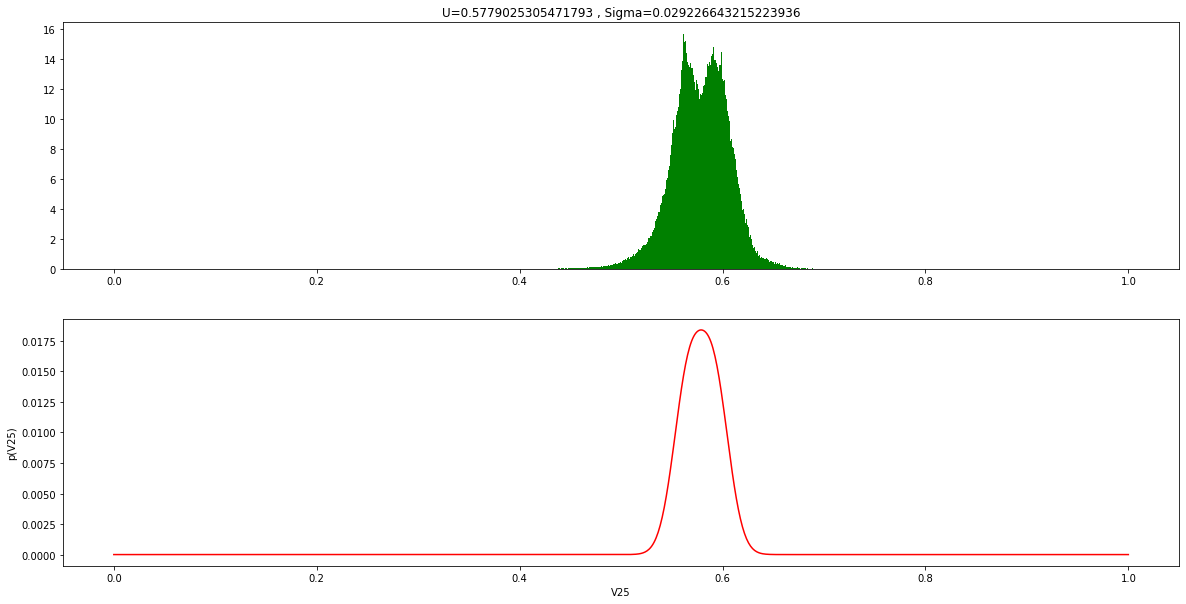

1.0000000000000004 V25 0.5779025305471793 0.029226643215223936


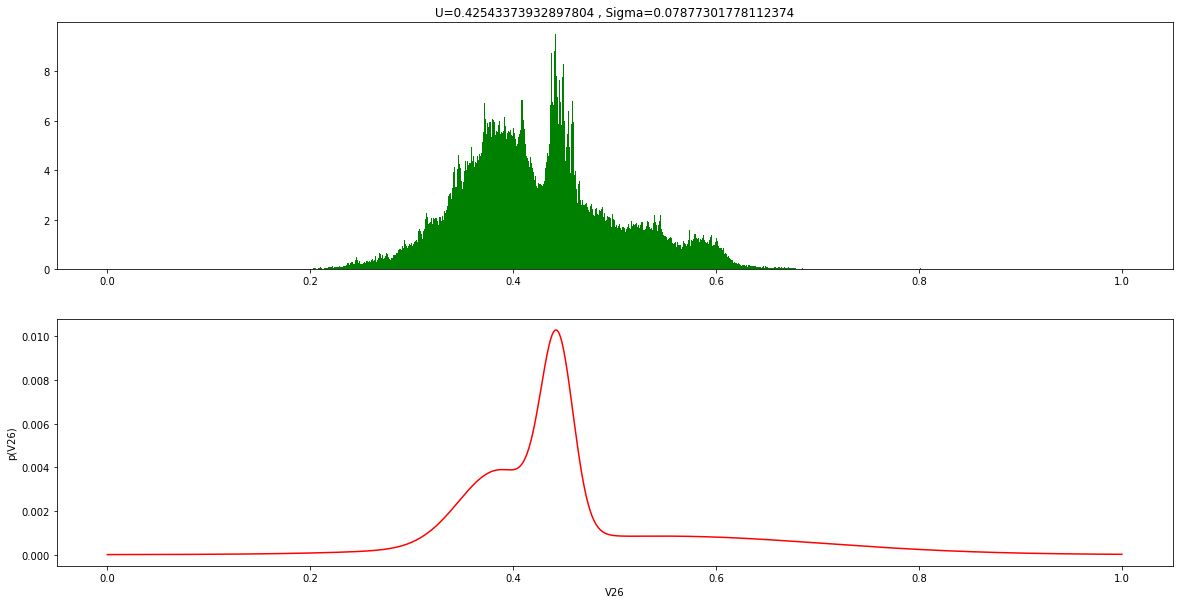

1.0000000000000009 V26 0.42543373932897804 0.07877301778112374


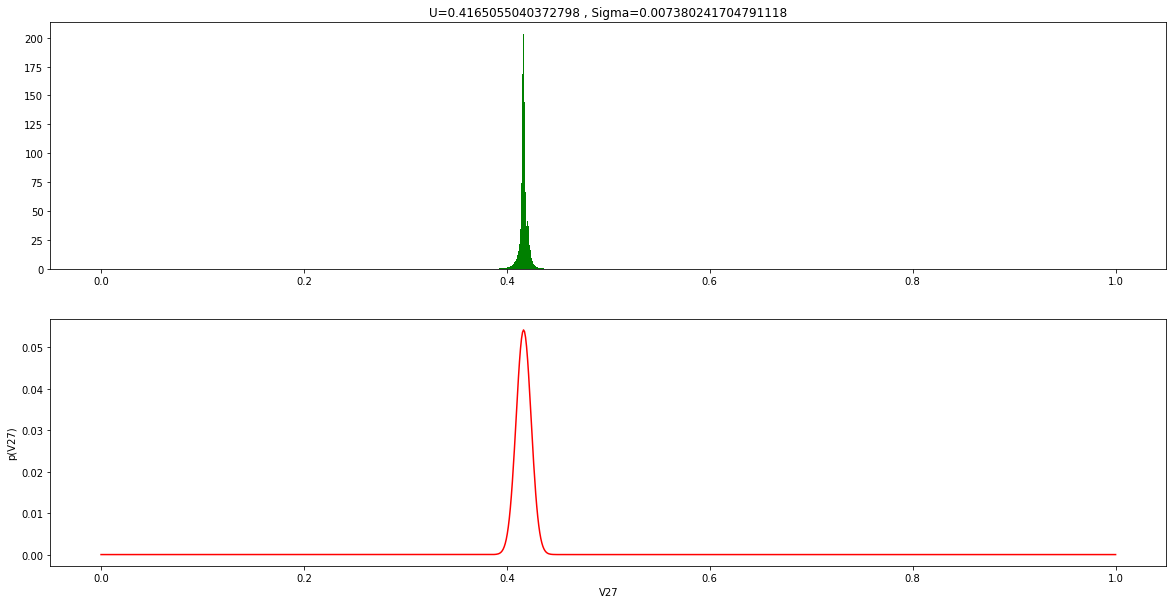

0.9999999999999996 V27 0.4165055040372798 0.007380241704791118


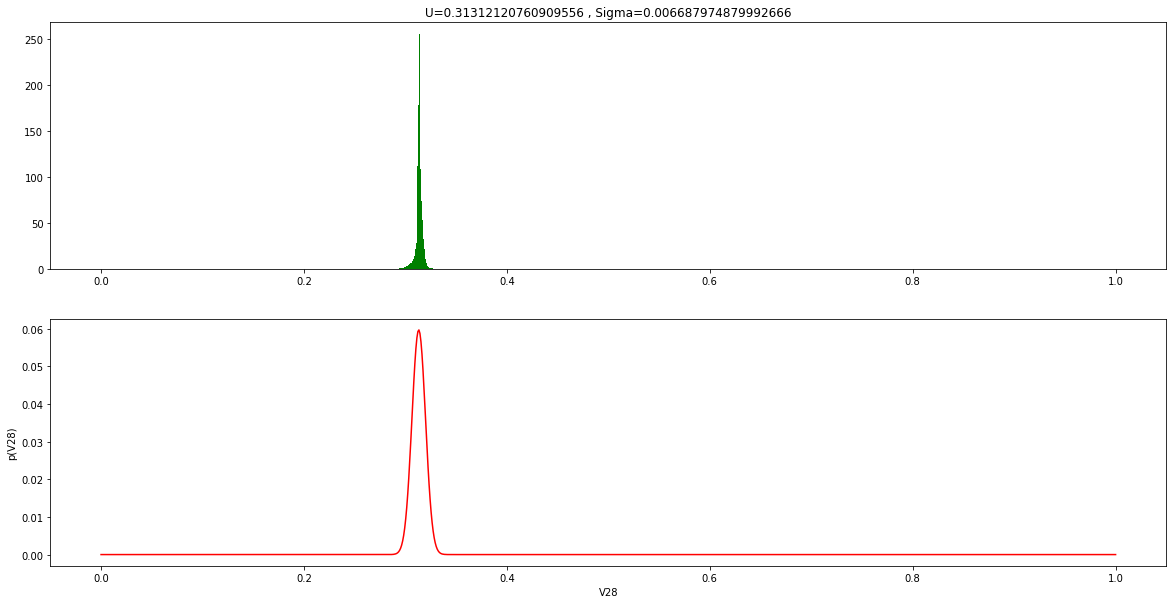

0.9999999999999999 V28 0.31312120760909556 0.006687974879992666


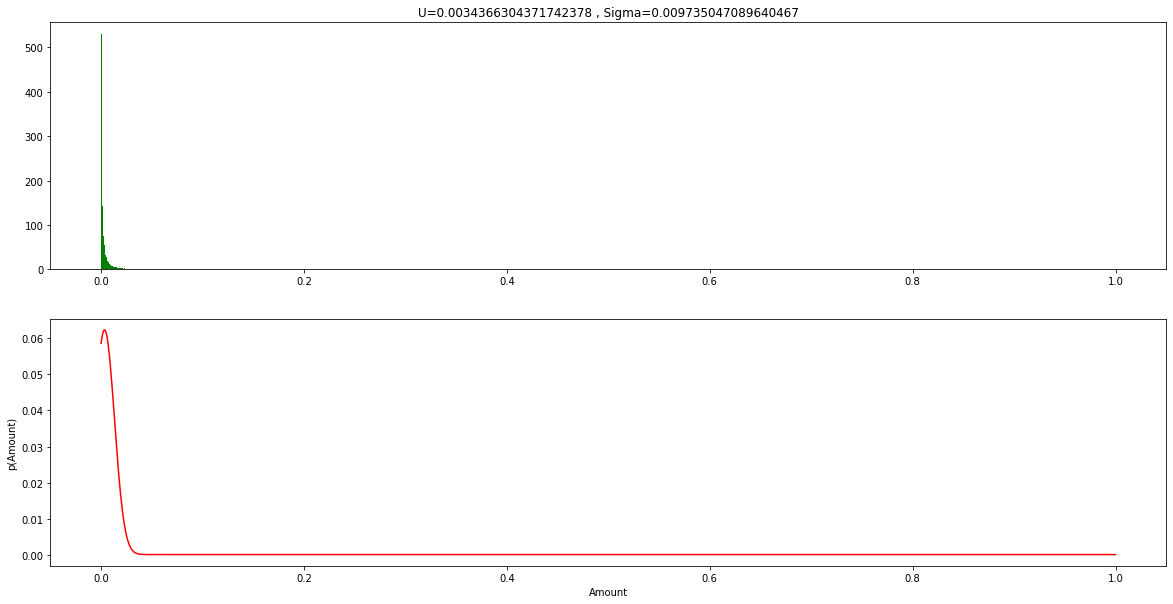

1.0000000000000004 Amount 0.0034366304371742378 0.009735047089640467


In [16]:
#--- Visualizando algunos datos
#Vals=[]
suma=0
for i in range(len(keys)):
    k=keys[i]
    u_c=np.mean(data[k])
    o_c=np.std(data[k])
    
    fig = plt.figure(figsize=(20,10))

    plt.subplot(211)
    n,bins,patch=plt.hist(data[k],bins =1000, color = 'green', density=True)
    plt.title('U='+str(u_c)+' , Sigma='+str(o_c))
    
    
    

   
    plt.subplot(212)
    x=np.linspace(0, 1, 1000)
    distribution=gauss(x,Vals[i][0],Vals[i][1])
    plt.xlabel(str(k))
    plt.ylabel('p('+str(k)+')')
    plt.plot(x,distribution, color='red')
    
    plt.show()
    suma=0
    suma=np.sum(distribution)
    
    print(suma, k, u_c, o_c)
    
   

In [8]:
#fig = plt.figure(figsize=(20,10))

#minimo=0
#maximo=1
#data_n=data['Amount']

#plt.subplot(211)

#n,bins,patch=plt.hist(data_n,bins=5000, color = 'green', density=True)
#plt.xlim(minimo,maximo)


#u=np.mean(data_n)
#o=np.std(data_n)




#x=np.linspace(minimo, maximo, 1000)
#distribution=gauss_1(x,u,o)
##distribution=gauss(x,Vals[23][0],Vals[23][1])
#plt.title('U='+str(u)+' , Sigma='+str(o))


#plt.subplot(212)
#plt.xlabel('V_n')
#plt.ylabel('p()')
#plt.plot(x,distribution, color='red')
#plt.xlim(minimo,maximo)

#plt.show()
#suma=0
#suma=np.sum(distribution)

#print(suma, u, o)

In [9]:
#u=[0.0034366304371742378]
#o=[0.009735047089640467]
#Vals.append([u,o])

In [10]:
#Valores_mean = pd.DataFrame(columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
#                  index=range(10))
#
#
#Valores_std = pd.DataFrame(columns=['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
#       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
#       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
#                  index=range(10))
#for i in range(len(Vals)):
#
#    Valores_mean[keys[i]] = Vals[i][0]
#    Valores_std[keys[i]]= Vals[i][1]
    
    


In [11]:
data_tot = pd.read_csv('creditcard.csv', error_bad_lines=False)
data_bad=data_tot
good_index=data_bad[ data_bad['Class'] == 0 ].index
data_bad.drop(good_index , inplace=True)
data_bad.head(10)

/opt/homebrew/Cellar/jupyterlab/3.1.10/libexec/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
6336,7543.0,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,...,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00,1
6338,7551.0,0.316459,3.809076,-5.615159,6.047445,1.554026,-2.651353,-0.746579,0.055586,-2.678679,...,0.208828,-0.511747,-0.583813,-0.219845,1.474753,0.491192,0.518868,0.402528,1.00,1
6427,7610.0,0.725646,2.300894,-5.329976,4.007683,-1.730411,-1.732193,-3.968593,1.063728,-0.486097,...,0.589669,0.109541,0.601045,-0.364700,-1.843078,0.351909,0.594550,0.099372,1.00,1


In [12]:
data_bad.to_csv('data_bad.csv',encoding='utf-8', index=False)

In [13]:
len(data_bad)

492

In [14]:
data_bad['Class'].value_counts()

1    492
Name: Class, dtype: int64